## Exploratory Data Analysis

In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
import seaborn as sns
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [3]:
wines = pd.read_csv('../datasets/wine-reviews/winemag-data_first150k.csv')

geoshape = gpd.read_file('../datasets/worldmapshapes/ne_110m_admin_0_countries.shp')[['ADMIN', 'geometry']]
geoshape.columns = ['country', 'geometry']

In [4]:
wines.drop(['Unnamed: 0'], inplace=True, axis=1)

In [5]:
wines.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [6]:
wines.country.unique()

array(['US', 'Spain', 'France', 'Italy', 'New Zealand', 'Bulgaria',
       'Argentina', 'Australia', 'Portugal', 'Israel', 'South Africa',
       'Greece', 'Chile', 'Morocco', 'Romania', 'Germany', 'Canada',
       'Moldova', 'Hungary', 'Austria', 'Croatia', 'Slovenia', nan,
       'India', 'Turkey', 'Macedonia', 'Lebanon', 'Serbia', 'Uruguay',
       'Switzerland', 'Albania', 'Bosnia and Herzegovina', 'Brazil',
       'Cyprus', 'Lithuania', 'Japan', 'China', 'South Korea', 'Ukraine',
       'England', 'Mexico', 'Georgia', 'Montenegro', 'Luxembourg',
       'Slovakia', 'Czech Republic', 'Egypt', 'Tunisia', 'US-France'],
      dtype=object)

In [7]:
grouped = wines.groupby(by=['country'], as_index=False).mean()
grouped.country.replace({
    'England': 'United Kingdom',
    'US': 'United States of America',
    'Serbia': 'Republic of Serbia',
    'Czech Republic': 'Czechia'
}, inplace=True)
grouped.head()

,country,points,price
0,Albania,88.000000,20.000000
1,Argentina,85.996093,20.794881
2,Australia,87.892475,31.258480
3,Austria,89.276742,31.192106
4,Bosnia and Herzegovina,84.750000,12.750000


In [8]:
merged = geoshape.merge(grouped, on='country', how='left')

/home/gauthier/anaconda3/envs/wines-reviews/lib/python3.7/site-packages/matplotlib/colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


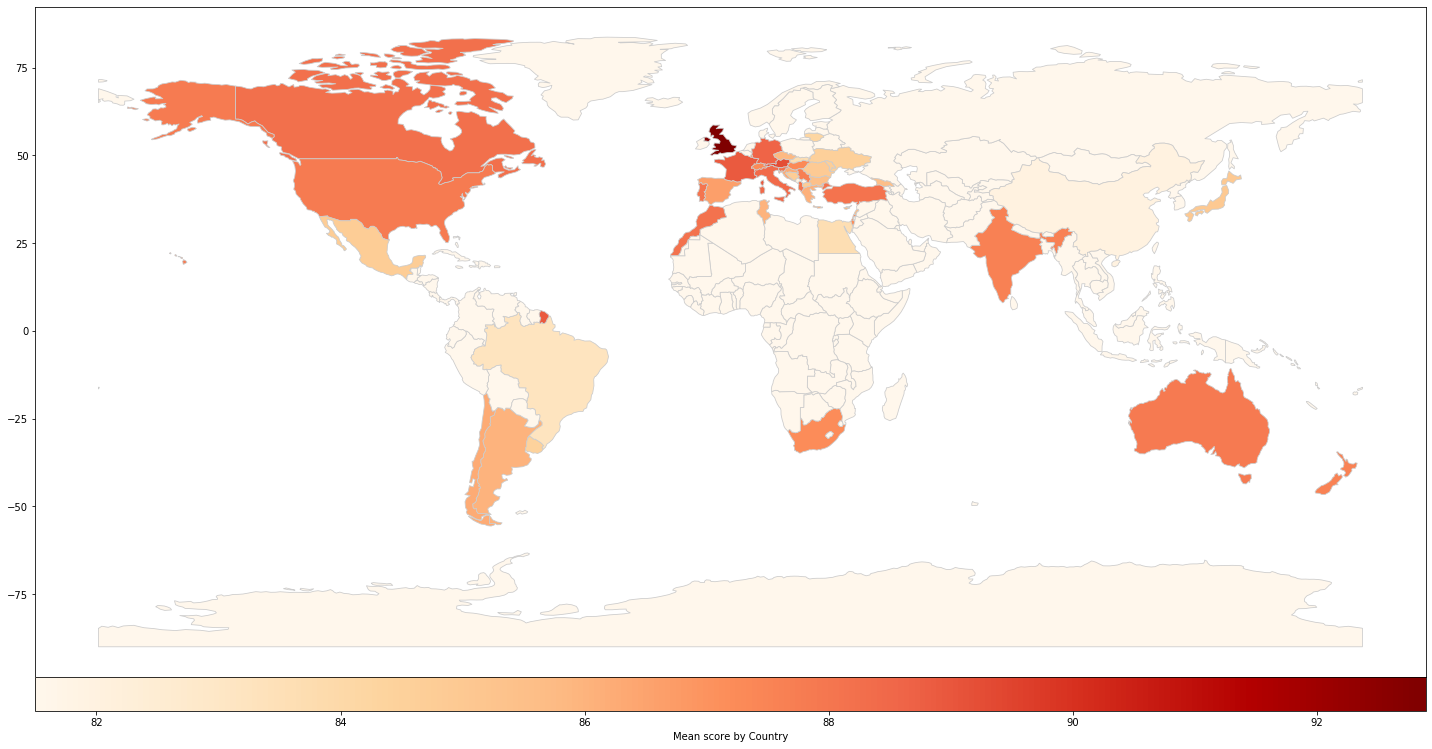

In [9]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, figsize=(20, 12))
divider = make_axes_locatable(ax)
cax = divider.append_axes("bottom", size="5%", pad=0)
merged.plot(column='points', cmap='OrRd', linewidth=0.8, edgecolor='0.8', ax=ax, legend=True,
            legend_kwds={'label': "Mean score by Country", 'orientation': "horizontal"}, cax=cax)
plt.tight_layout()


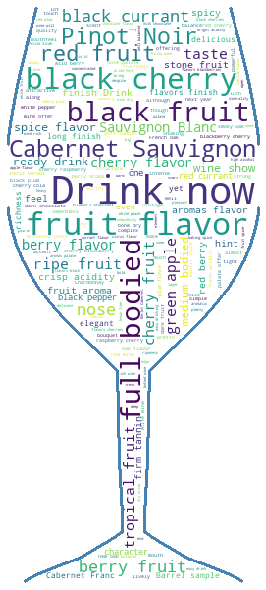

In [12]:
words = ' '.join(wines.description.values)
char_mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/8/y/e/T/u/1/wine-glass-hi.png', stream=True).raw))
image_colors = ImageColorGenerator(char_mask)
word_cloud = WordCloud(background_color='white', stopwords=STOPWORDS, mask=char_mask, max_words=200, contour_width=3, contour_color='steelblue').generate(words)
plt.figure(figsize=(10,8))
plt.imshow(word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

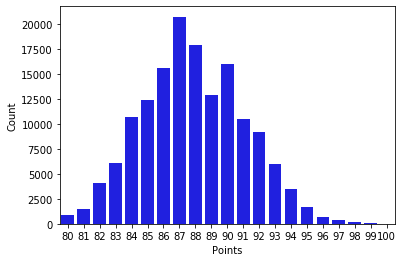

In [13]:
count_plot = sns.countplot(x='points',  data=wines, color='blue')
count_plot.set_xlabel('Points')
count_plot.set_ylabel('Count')
plt.show()

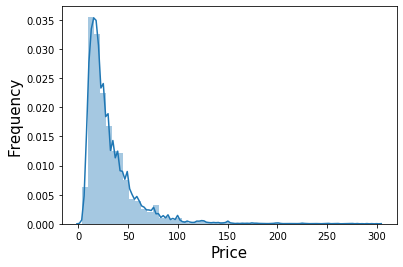

In [14]:
price_distrib = sns.distplot(wines[wines['price'] < 300]['price'])
price_distrib.set_xlabel("Price", fontsize=15)
price_distrib.set_ylabel("Frequency", fontsize=15)
plt.show()

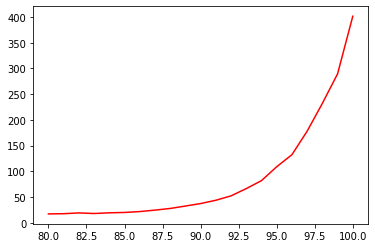

In [15]:
data = wines.groupby(['points']).mean()
plt.plot(data.index, data.values, c='red')
